# Learning and Decision Making

## Laboratory 1: Markov chains

In the end of the lab, you should export the notebook to a Python script (File >> Download as >> Python (.py)). Your file should be named `padi-lab1-groupXX.py`, where the `XX` corresponds to your group number and should be submitted to the e-mail <adi.tecnico@gmail.com>. 

Make sure...

* **... that the subject is of the form `[<group n.>] LAB <lab n.>`.** 

* **... to strictly respect the specifications in each activity, in terms of the intended inputs, outputs and naming conventions.** 

In particular, after completing the activities you should be able to replicate the examples provided (although this, in itself, is no guarantee that the activities are correctly completed).

### 1. The Markov chain model

Consider once again the Pacman modeling problem described in the Homework and for which you wrote a Markov chain model. In this lab, you will consider a larger version of the Pacman problem, described by the diagram:

<img src="pacman-big.png">

Recall that your chain should describe the motion of the single ghost moving in the environment, where: 

* The cells are numbered from 1 to 35, as indicated by the blue numbers;
* At each moment, the ghost is in one of the 35 cells; at the next time step, it will move to one of the adjacent cells with equal probability;
* The cell in the bottom left corner (cell `29`) is adjacent, to the left, to the cell in the bottom right corner (cell `35`). In other words, if the ghost "moves left" in cell `29` it will end up in cell `35` and vice-versa.

In this first activity, you will implement your Markov chain model in Python. You will start by loading the transition probability matrix from a `numpy` binary file, using the `numpy` function `load`. You will then consider the state space to consist of all possible cells in the environment, each represented as a string. For example, if the environment has 10 cells, the states should include the strings `'1'` to `'10'`. 

---

#### Activity 1.        

Write a function named `load_chain` that receives, as input, a string corresponding to the name of a file containing a transition probability matrix for some Pacman maze to be loaded and returns, as output, a two-element tuple corresponding to the Markov chain that describes the movement of the ghost, where:

* ... the first element is a tuple containing an enumeration of the state-space (i.e., each element of the tuple corresponds to a state of the chain, represented as a string).
* ... the second element is a `numpy` array corresponding to the transition probability matrix for the chain.

**Note:** The file provided contains the transition probability matrix for the maze in the diagram above. However, your code will be tested with mazes of different sizes, so **make sure not to hard-code the size of the environment into your code**.

---

In [68]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as rnd

def load_chain(fName):
  X = ('1', '2', '3', '4', '5', '6', '7',
       '8', '9', '10', '11', '12', '13', '14',
       '15', '16', '17', '18', '19', '20', '21',
       '22', '23', '24', '25', '26', '27', '28',
       '29', '30', '31', '32', '33', '34', '35')
  
  P = np.load(fName)
  
  markovChain = (X, P)

  return markovChain

Number of states: 35
Type of states: <class 'str'>
First state: 1

Transition probability matrix (type): <class 'numpy.ndarray'>
Transition probability matrix (dimension): (35, 35)


We provide below an example of application of the function, that you can use as a first "sanity check" for your code. Note, however, that the fact that you can replicate the examples below is not indicative that your code is correct.

```python
M = load_chain('pacman-big.npy')

print('Number of states:', len(M[0]))
print('Type of states:', type(M[0][0]))
print('First state:', M[0][0])
print('\nTransition probability matrix (type):', type(M[1]))
print('Transition probability matrix (dimension):', M[1].shape)```

Output:
```
Number of states: 35
Type of states: <class 'str'>
First state: 1

Transition probability matrix (type): <class 'numpy.ndarray'>
Transition probability matrix (dimension): (35, 35)
```

In the next activity, you will use the Markov chain model to evaluate the likelihood of any given path for the ghost.

---

#### Activity 2.

Write a function `prob_trajectory` that receives, as inputs, 

* ... a Markov chain in the form of a tuple like the one returned by the function in Activity 1;
* ... a trajectory, corresponding to a sequence of states (i.e., a tuple or list of strings, each string corresponding to a state).

Your function should return, as output, a floating point number corresponding to the probability of observing the provided trajectory, taking the first state in the trajectory as initial state. 

---

In [69]:
def prob_trajectory(markovChain, trajectory):
    P = markovChain[1]
    trajectProb = 1
    
    for i in range(len(trajectory) - 1):
      currentCell = int(trajectory[i]) - 1
      nextCell = int(trajectory[i+1]) - 1
      
      trajectProb = trajectProb * P[currentCell][nextCell]
    
    return trajectProb

Prob. of trajectory ('3', '9', '15'): 0.16666666666666666
Prob. of trajectory ('6', '7', '12', '11', '10'): 0.0625
Prob. of trajectory ('10', '11', '17'): 0.0
Prob. of trajectory ('34', '35', '29'): 0.25


Example of application of the function with the chain $M$ from Activity 1.

```python
print("Prob. of trajectory ('3', '9', '15'):", prob_trajectory(M, ('3', '9', '15')))
print("Prob. of trajectory ('6', '7', '12', '11', '10'):", prob_trajectory(M, ('6', '7', '12', '11', '10')))
print("Prob. of trajectory ('10', '11', '17'):", prob_trajectory(M, ('10', '11', '17')))
print("Prob. of trajectory ('34', '35', '29'):", prob_trajectory(M, ('34', '35', '29')))
```

Output:
```
Prob. of trajectory ('3', '9', '15'): 0.16666666666666666
Prob. of trajectory ('6', '7', '12', '11', '10'): 0.0625
Prob. of trajectory ('10', '11', '17'): 0.0
Prob. of trajectory ('34', '35', '29'): 0.25
```

Note that your function should work with **any** Markov chain that is specified as a tuple like the one from Activity 1.

### 2. Stability

The next activities explore the notion of *stationary distribution* for the chain, a central concept in the the PageRank algorithm.

---

#### Activity 3

Write a function `stationary_dist` that receives, as input, a Markov chain in the form of a tuple like the one returned by the function in Activity 1. Your function should return, as output, a `numpy` array corresponding to a row vector containing the stationary distribution for the chain.

**Note:** The stationary distribution is a *left* eigenvector of the transition probability matrix associated to the eigenvalue 1. As such, you may find useful the numpy function `numpy.linalg.eig`. Also, recall that the stationary distribution is *a distribution*.

---

In [70]:
def stationary_dist(markovChain):
    transposedP = markovChain[1].T
    
    eigenValues, eigenVectors = np.linalg.eig(transposedP)
    
    absoluteValues = np.abs(eigenValues - 1)
    lineIndex = np.argmin(absoluteValues)
    
    transposedEigenVectors = eigenVectors.T
    stationaryDist = np.real(transposedEigenVectors[lineIndex])
    
    stationaryDistTotalSum = np.sum(stationaryDist)
    normalizedDist = stationaryDist/stationaryDistTotalSum
    
    return normalizedDist

Stationary distribution:
[0.03 0.03 0.05 0.03 0.03 0.03 0.03 0.04 0.03 0.03 0.03 0.03 0.05 0.03
 0.07 0.03 0.04 0.03 0.03 0.04 0.04 0.05 0.03 0.02 0.02 0.02 0.02 0.02
 0.01 0.   0.   0.01 0.01 0.01 0.01]

Is u* * P = u*? True


Example of application of the function with the chain $M$ from Activity 1.

```python
u_star = stationary_dist(M)

print('Stationary distribution:')
print(np.round(u_star, 2))

u_prime = u_star.dot(M[1])

print('\nIs u* * P = u*?', np.all(np.isclose(u_prime, u_star)))
```

Output:
```
Stationary distribution:
[0.03 0.03 0.05 0.03 0.03 0.03 0.03 0.04 0.03 0.03 0.03 0.03 0.05 0.03
 0.07 0.03 0.04 0.03 0.03 0.04 0.04 0.05 0.03 0.02 0.02 0.02 0.02 0.02
 0.01 0.   0.   0.01 0.01 0.01 0.01]

Is u* * P = u*? True
```

To complement Activity 3, you will now empirically establish that the chain is ergodic, i.e., no matter where the ghost starts, its visitation frequency will eventually converge to the stationary distribution.

---

#### Activity 4.

Write a function `compute_dist` that receives, as inputs, 

* ... a Markov chain in the form of a tuple like the one returned by the function in Activity 1;
* ... a row vector (a numpy array) corresponding to the initial distribution for the chain;
* ... an integer $N$, corresponding to the number of steps that the bot is expected to take.

Your function should return, as output, a row vector (a `numpy` array) containing the distribution after $N$ steps of the chain.

---

In [71]:
def compute_dist(markovChain, initialDistribution, N):
    P = np.linalg.matrix_power(markovChain[1], N)

    finalDistribution = initialDistribution.dot(P)
    
    return finalDistribution


Is u * P^100 = u*? False

Is u * P^2000 = u*? True


Example of application of the function with the chain $M$ from Activity 1.

```python
import numpy.random as rnd

# Number of states
nS = len(M[0])

rnd.seed(42)

# Initial random distribution
u = rnd.random((1, nS))
u = u / np.sum(u)

# Distrbution after 100 steps
v = compute_dist(M, u, 100)
print('\nIs u * P^100 = u*?', np.all(np.isclose(v, u_star)))

# Distrbution after 2000 steps
v = compute_dist(M, u, 2000)
print('\nIs u * P^2000 = u*?', np.all(np.isclose(v, u_star)))
```

Output:
```
Is u * P^100 = u*? False

Is u * P^2000 = u*? True
```

Is the chain ergodic? Justify, based on the results above.

For the Markov Chain to be ergodic it needs to be irreducible and aperiodic. The given Markov Chain in this exercise is irreducible since it possible for any state to be reached from any other state. The given chain is also aperiodic since the period of all given states is 1, we can conclude this because the chain is irreducible and if one state has period 1, all the states from the chain have period 1 as well. Besides that, the chain eventually reaches the stationary distribution, we can observe this because at around 100 steps the distribution did not reach the stationary distribution yet, but at around 2000 steps it did.

### 3. Simulation

In this part of the lab, you will *simulate* the actual bot, and empirically compute the visitation frequency of each state.

---

#### Activity 5

Write down a function `simulate` that receives, as inputs, 

* ... a Markov chain in the form of a tuple like the one returned by the function in Activity 1;
* ... a row vector (a `numpy` array) corresponding to the initial distribution for the chain;
* ... an integer $N$, corresponding to the number of steps that the bot is expected to take.

Your function should return, as output, a tuple containing a trajectory containing $N$ states, obtained from the initial distribution provided. Each element in the tuple should be a string corresponding to a state index.

---

**Note:** You may find useful to import the numpy module `numpy.random`.

In [72]:
def simulate(markovChain, initialDistribution, N):
    expectedTrajectory = ()
    
    stepDistribution = initialDistribution[0]
    X = markovChain[0]
    P = markovChain[1]
    for i in range(N):
        nextCellList = np.random.choice(X, 1, p = stepDistribution)
        nextCell = nextCellList[0]
        
        expectedTrajectory = expectedTrajectory + (nextCell,)
        
        stepDistribution = P[X.index(nextCell)]
        
    return expectedTrajectory

Small trajectory: ('14', '15', '16', '17', '10', '11', '10', '17', '16', '17')
End of large trajectory: ('13', '8', '1', '8', '1', '8', '1', '8', '13', '20')


Example of application of the function with the chain $M$ from Activity 1.

```python
# Number of states
nS = len(M[0])

# Initial, uniform distribution
u = np.ones((1, nS)) / nS

np.random.seed(42)

# Simulate short trajectory
traj = simulate(M, u, 10)
print('Small trajectory:', traj)

# Simulate a long trajectory
traj = simulate(M, u, 10000)
print('End of large trajectory:', traj[-10:])
```

Output:
```
Small trajectory: ('14', '15', '16', '17', '10', '11', '10', '17', '16', '17')
End of large trajectory: ('13', '8', '1', '8', '1', '8', '1', '8', '13', '20')
```

Note that, even if the seed is fixed, it is possible that your trajectories are slightly different.

---

#### Activity 6

Use the function `simulate` from Activity #5 to generate a 20,000-step trajectory. Plot the histogram of the obtained trajectory using the function `hist` from the module `matplotlib.pyplot`. Make sure that the histogram has one bin for each state. Compare the relative frequencies with the result of Activity #3.

**Note**: Don't forget to load `matplotlib`. 

**Note 2**: Recall that the states in the trajectory obtained from the function `simulate` consist of *strings*, which should be converted to state indices to match the entries in the distribution computed in Activity #3.

---

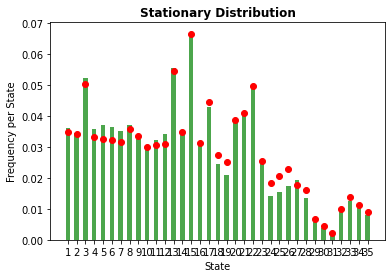

In [73]:
markovChain = load_chain('pacman-big.npy')
X, P = markovChain
nS = len(X)

rnd.seed(42)

# Initial random distribution
u = rnd.random((1, nS))
u = u / np.sum(u)

nSteps = 20000

states = simulate(markovChain, u, nSteps)
x = [X.index(state) for state in states]
   
n, bins, patches = plt.hist(x, rwidth = 0.5 ,bins = np.arange(nS + 1) - 0.5, 
                            density = 1, color ='green', alpha = 0.7)
   
stationaryDist = stationary_dist(markovChain)

plt.plot(X, stationaryDist, 'ro', label="Stationary Distribution")
  
plt.xlabel('State')
plt.ylabel('Frequency per State')
  
plt.title('Stationary Distribution', fontweight ="bold")
  
plt.show()